In [3]:
from mdf_forge import Forge
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Helper Functions

In [2]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def shape_data(res):
    features = []
    for r in res:
        feat = {}
        feat.update(r['projects']['verde'])
        feat.update(r['molecule'])
        features.append(flatten(feat))
    return pd.DataFrame(features)

# Instantiate Forge Client

In [9]:
mdf = Forge()

In [10]:
?Forge

Init signature: Forge(index='mdf', local_ep=None, anonymous=False, clear_old_tokens=False, **kwargs)
Docstring:     
Forge fetches metadata and files from the Materials Data Facility.
Forge is intended to be the best way to access MDF data for all users.
An internal Query object is used to make queries. From the user's perspective,
an instantiation of Forge will black-box searching.
Init docstring:
Create an MDF Forge Client.

Arguments:
    index (str): The Search index to search on. **Default:** ``"mdf"``.
    local_ep (str): The endpoint ID of the local Globus Connect Personal endpoint.
            If needed but not provided, the local endpoint will be autodetected
            if possible.
    anonymous (bool): If ``True``, will not authenticate with Globus Auth.
            If ``False``, will require authentication.
            **Default:** ``False``.

            Caution:
                Authentication is required for some Forge functionality,
                including viewing pri

# Match All VERDE Records

In [11]:
res = mdf.match_resource_types("record")
res = res.match_source_names("abrehabiruk_virtual_db")
res = res.search()

# Inspect the Metadata for One Record

In [12]:
res[0]

{'files': [{'data_type': 'ASCII text',
   'filename': 'GKVDXUXIAHWQIK-UHFFFAOYSA-N_cat-rad_vac_freq.log',
   'globus': 'globus://82f1b5c6-6e9b-11e5-ba47-22000b92c6ec/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/GKVDXUXIAHWQIK-UHFFFAOYSA-N/GKVDXUXIAHWQIK-UHFFFAOYSA-N_cat-rad_vac_freq.log',
   'length': 62551,
   'mime_type': 'text/plain',
   'sha512': '412cb4474716f7c2364e3b88f9605c8c04c9d942ff26ca14e98443b9e56e383dbe15fa4aa800ed650c89d8ce4eddd129a370f1a9bd35b07300a21e0da21a35fb',
   'url': 'https://data.materialsdatafacility.org/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/GKVDXUXIAHWQIK-UHFFFAOYSA-N/GKVDXUXIAHWQIK-UHFFFAOYSA-N_cat-rad_vac_freq.log'},
  {'data_type': 'ASCII text',
   'filename': 'GKVDXUXIAHWQIK-UHFFFAOYSA-N_S1_solv_freq.log',
   'globus': 'globus://82f1b5c6-6e9b-11e5-ba47-22000b92c6ec/verde/abrehabiruk_virtual_db_v1.1/verde_calcs.tar/GKVDXUXIAHWQIK-UHFFFAOYSA-N/GKVDXUXIAHWQIK-UHFFFAOYSA-N_S1_solv_freq.log',
   'length': 84937,
   'mime_type': 'text/plain',
  

# VERDE-specific Metadata 

In [13]:
res[0]['projects']['verde']

{'0_0': {'S1': 3.53, 'T1': 3.01},
 'dipole_moment': {'S0': 2.2142, 'S1': 2.2142, 'T1': 3.3892},
 'ionization_potential': 10.57,
 'redox_potential': {'S0': 3.38, 'S1': -0.15, 'T1': 0.37},
 'vertical_excitation_energy': 3.51}

# Information on the Molecule

In [14]:
res[0]['molecule']

{'homo': -8.165865,
 'inchi_key': 'GKVDXUXIAHWQIK-UHFFFAOYSA-N',
 'lumo': -1.967927,
 'smiles': 'N1=NC1'}

In [15]:
df = shape_data(res)
df.head()

,0_0_S1,0_0_T1,dipole_moment_S0,dipole_moment_S1,dipole_moment_T1,homo,inchi_key,ionization_potential,lumo,redox_potential_S0,redox_potential_S1,redox_potential_T1,smiles,vertical_excitation_energy
0,3.53,3.01,2.21420,2.2142,3.38920,-8.165865,GKVDXUXIAHWQIK-UHFFFAOYSA-N,10.57,-1.967927,3.38,-0.15,0.37,N1=NC1,3.51
1,NaN,0.76,0.69833,NaN,5.91455,-5.916844,BVBWGQQLKITHLL-FOCLMDBBSA-N,6.64,-2.936653,1.01,NaN,0.25,CC#Cc1ccc(o1)/N=N/c1ccc(o1)C#CC,NaN
2,NaN,1.07,4.70836,NaN,6.89634,-5.982151,KRUMPIYRKNRXGF-SZWZUZNMSA-N,6.83,-2.584265,1.14,NaN,0.07,O/C=C\c1ccc(cc1)/N=N/c1ccc(cc1)/C=C\O,NaN
3,NaN,1.06,0.42030,NaN,3.72330,-6.095350,RYSCLVZXACDRPK-QURGRASLSA-N,6.82,-2.741547,1.15,NaN,0.09,c1csc(c1)c1ccc(cc1)/N=N/c1ccc(cc1)c1cccs1,NaN
4,NaN,0.20,3.13260,NaN,2.78480,-5.793304,IIEZTXLLWBCGON-DQSJHHFOSA-N,6.65,-2.994069,0.83,NaN,0.63,FC(c1ccc([nH]1)c1ccc(s1)/N=N\c1ccc(s1)c1ccc([n...,NaN


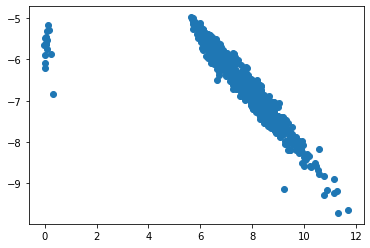

In [16]:
plt.scatter(df.ionization_potential, df.homo)

# Matching Ranges
Here we match records where the 8.5 < ionization_potential < 11.0

In [17]:
res = mdf.match_resource_types("record")
res = res.match_source_names("abrehabiruk_virtual_db")
res = res.match_range('projects.verde.ionization_potential', start=8.5, stop=11.0)
res = res.search()
len(res)

155

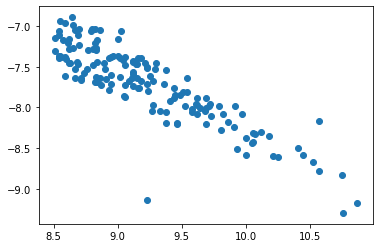

In [18]:
df = shape_data(res)
plt.scatter(df.ionization_potential, df.homo)

# Pull the Raw Calculations for analysis

In [19]:
res = mdf.match_resource_types("record")
res = res.match_source_names("abrehabiruk_virtual_db")
res = res.match_range('projects.verde.ionization_potential', start=10.0, stop=11.0)
res = res.search()
len(res)

18

In [22]:
# NBVAL_SKIP
status = mdf.globus_download(res, dest="/Users/ben/Desktop/globus/verde", preserve_dir=True)


Transferring data: 100%|██████████| 1/1 [02:58<00:00, 178.61s/it]


All transfers processed
1 transfers succeeded
0 transfers failed
